## Kmeans with mini_sample

In [4]:
import pandas as pd

path = '/Users/reneehall/Documents/Learning/lighthouse_labs/coursework-lighthouse-labs/Mid-term project/colab_data/'
flights = pd.read_csv(path+'balanced_more_flight_feats.csv')

In [5]:
# import Kmeans 
from sklearn.cluster import KMeans

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

from sklearn.preprocessing import StandardScaler

## Continuous

In [7]:
# assign X and y
cols=['day', 'month', 'weekday', 'op_unique_carrier', 
      'origin', 'dest',
           'crs_arr_daytime', 'crs_dep_daytime', 
           'origin_airport_size', 'dest_airport_size', 
      'dist_group', 'season', 'dep_early_morning']
# 'mkt_carrier_fl_num', 'op_carrier_fl_num', 'mkt_unique_carrier',

#flights['arr_delay_flag'] = flights['arr_delay'].map(lambda x: 1 if x > 0 else 0)

X = flights[cols]
y = flights['arr_delay']

In [8]:
X = pd.get_dummies(X, columns=['op_unique_carrier','origin','dest',
                               'crs_arr_daytime','crs_dep_daytime',
                               'month','weekday','day',
                               'dist_group','season','dep_early_morning',
                               'origin_airport_size','dest_airport_size'])

X.head()

,op_unique_carrier_9E,op_unique_carrier_9K,op_unique_carrier_AA,op_unique_carrier_AS,op_unique_carrier_AX,op_unique_carrier_B6,op_unique_carrier_C5,op_unique_carrier_CP,op_unique_carrier_DL,op_unique_carrier_EM,...,dep_early_morning_0,dep_early_morning_1,origin_airport_size_1,origin_airport_size_2,origin_airport_size_3,origin_airport_size_4,dest_airport_size_1,dest_airport_size_2,dest_airport_size_3,dest_airport_size_4
0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xsc = scaler.fit_transform(y)

ValueError: Expected 2D array, got 1D array instead:
array=[-12.   5.   1. ... -18. -14. -22.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt: 


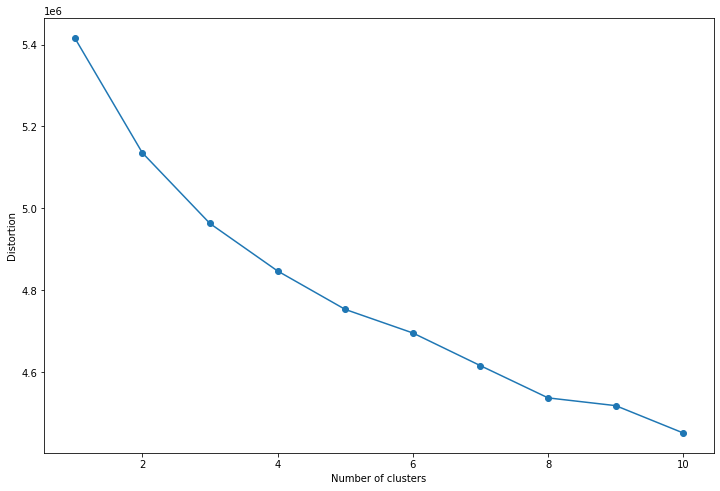

In [20]:
# elbow rule
def plot_distortion(y,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(y)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

plot_distortion(y, max_clusters=10)

In [21]:
km = KMeans(n_clusters=5,
           n_init=10,
           random_state=0)

km.fit(y_train)
y_km = km.predict(y_test)

NameError: name 'y_train' is not defined

In [14]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='black',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

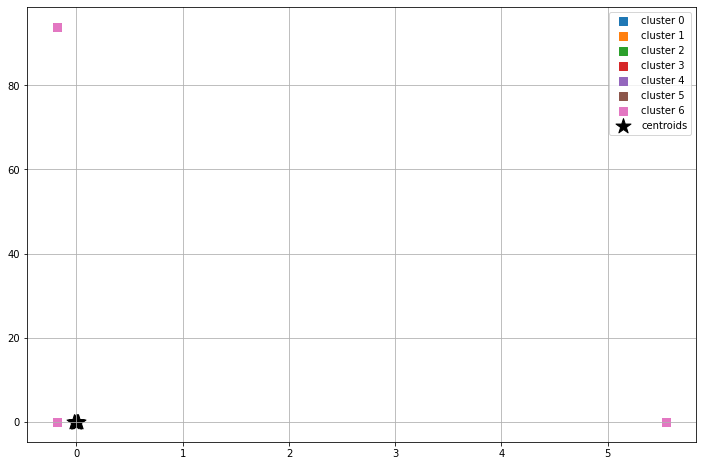

In [15]:
plot_clusters(Xsc,  y_km, plt_cluster_centers=True)

In [16]:
y_km

array([1, 1, 3, ..., 1, 1, 5], dtype=int32)

## binary

In [ ]:
flights['arr_delay_flag'] = flights['arr_delay'].map(lambda x: 1 if x > 0 else 0)

y = flights['arr_delay_flag']

In [ ]:
# elbow rule
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

plot_distortion(Xsc, max_clusters=10)